In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Parameters
NUM_RECORDS = 2200  # Desired total number of records
COMPANY_CODE = '123'  # 3-digit company code for Position Number

# Departments and their codes
DEPARTMENTS = {
    'Human Resources': '001',
    'Finance': '002',
    'Engineering': '003',
    'Marketing': '004',
    'Sales': '005',
    'Customer Service': '006',
    'Information Technology': '007',
    'Research and Development': '008',
    'Operations': '009',
    'Legal': '010'
}

# Classifications (Job Titles) and their codes
CLASSIFICATIONS = {
    'Software Engineer': '101',
    'Data Scientist': '102',
    'Project Manager': '103',
    'HR Specialist': '104',
    'Financial Analyst': '105',
    'Marketing Coordinator': '106',
    'Sales Associate': '107',
    'Customer Support Rep': '108',
    'IT Technician': '109',
    'Legal Advisor': '110',
    'Product Manager': '111',
    'Business Analyst': '112',
    'Operations Supervisor': '113',
    'Research Analyst': '114',
    'Graphic Designer': '115',
    'Content Writer': '116',
    'Quality Assurance': '117',
    'Network Engineer': '118',
    'Account Manager': '119',
    'Executive Assistant': '120',
    'UX Designer': '121',
    'DevOps Engineer': '122',
    'Data Engineer': '123',
    'Compliance Officer': '124',
    'Security Analyst': '125',
    'Recruiter': '126',
    'Training Coordinator': '127',
    'Payroll Specialist': '128',
    'Supply Chain Manager': '129',
    'Biomedical Engineer': '130'
}

# Comments options
COMMENTS_OPTIONS = [
    'declined', 'rescinded', 'cancelled', 'transfer',
    'promo', 'new to org', ''
]

# Names for 'Selection' column
FIRST_NAMES = [
    'James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer',
    'Michael', 'Linda', 'William', 'Elizabeth', 'David', 'Barbara',
    'Richard', 'Susan', 'Joseph', 'Jessica', 'Thomas', 'Sarah',
    'Charles', 'Karen', 'Christopher', 'Nancy', 'Daniel', 'Lisa',
    'Matthew', 'Betty', 'Anthony', 'Margaret', 'Mark', 'Sandra',
    'Donald', 'Ashley', 'Steven', 'Kimberly', 'Paul', 'Emily',
    'Andrew', 'Donna', 'Joshua', 'Michelle', 'Kenneth', 'Carol',
    'Kevin', 'Amanda', 'Brian', 'Dorothy', 'George', 'Melissa',
    'Edward', 'Deborah', 'Sophia', 'Ethan', 'Isabella', 'Mason',
    'Mia', 'Logan', 'Olivia', 'Lucas', 'Ava', 'Jackson', 'Charlotte'
]

LAST_NAMES = [
    'Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia',
    'Miller', 'Davis', 'Rodriguez', 'Martinez', 'Hernandez',
    'Lopez', 'Gonzalez', 'Wilson', 'Anderson', 'Thomas', 'Taylor',
    'Moore', 'Jackson', 'Martin', 'Lee', 'Perez', 'Thompson',
    'White', 'Harris', 'Sanchez', 'Clark', 'Ramirez', 'Lewis',
    'Robinson', 'Walker', 'Young', 'Allen', 'King', 'Wright',
    'Scott', 'Torres', 'Nguyen', 'Hill', 'Flores', 'Green',
    'Adams', 'Nelson', 'Baker', 'Hall', 'Rivera', 'Campbell',
    'Mitchell', 'Carter', 'Roberts', 'Gomez', 'Phillips', 'Evans',
    'Turner', 'Diaz', 'Parker', 'Cruz', 'Edwards', 'Collins'
]

# Helper Functions
def generate_unique_number(existing_numbers, length=7):
    """Generate a unique number of specified length."""
    num = random.randint(10**(length-1), 10**length - 1)
    while num in existing_numbers:
        num = random.randint(10**(length-1), 10**length - 1)
    existing_numbers.add(num)
    return str(num)

def generate_name():
    """Generate a random full name."""
    return f"{random.choice(FIRST_NAMES)} {random.choice(LAST_NAMES)}"

def random_date(start_date, end_date):
    """Generate a random date between two dates."""
    delta_days = (end_date - start_date).days
    random_days = random.randint(0, delta_days)
    return start_date + timedelta(days=random_days)

In [3]:
# Initialize counters and lists
total_records_generated = 0
recruitment_id = 0

# Keep track of unique numbers
existing_recruitment_numbers = set()
existing_position_numbers = set()

# Date ranges
INTERVIEW_START_DATE = datetime(2022, 1, 1)
INTERVIEW_END_DATE = datetime(2023, 6, 30)

# Data lists
recruitment_numbers = []
position_numbers = []
classifications_list = []
departments_list = []
interview_dates = []
selections = []
job_offer_dates = []
effective_dates = []
comments_list = []

In [4]:
# Loop until we reach the desired number of records
while total_records_generated < NUM_RECORDS:
    recruitment_id += 1
    # Recruitment Number
    rec_num = generate_unique_number(existing_recruitment_numbers)

    # Classification and Department for this recruitment
    classification = random.choice(list(CLASSIFICATIONS.keys()))
    department = random.choice(list(DEPARTMENTS.keys()))

    # Determine the remaining records needed
    records_remaining = NUM_RECORDS - total_records_generated

    # Number of positions to fill for this recruitment
    max_positions = min(records_remaining, 5)  # Limit positions per recruitment to 5
    num_positions = random.randint(1, max_positions)

    # Keep track of applications for this recruitment
    recruitment_applications = []

    # Flags to track if there is a successful hire
    has_successful_hire = False

    for position_seq in range(1, num_positions + 1):
        # Position Number
        department_code = DEPARTMENTS[department]
        classification_code = CLASSIFICATIONS[classification]
        unique_position_id = f"{position_seq:03d}"
        pos_num = f"{COMPANY_CODE}-{department_code}-{classification_code}-{unique_position_id}"

        # Ensure Position Number is unique
        while pos_num in existing_position_numbers:
            position_seq += 1
            unique_position_id = f"{position_seq:03d}"
            pos_num = f"{COMPANY_CODE}-{department_code}-{classification_code}-{unique_position_id}"
        existing_position_numbers.add(pos_num)

        # Determine the outcome for this application
        # Possible outcomes: hired, declined, rescinded, cancelled
        # Logic:
        # - If there is already a successful hire, no 'cancelled' comments
        # - If not, 'cancelled' can occur
        # - 'declined' or 'rescinded' should have a selection name
        # - 'cancelled' usually has no selection name and no interview date
        # - Proportionally distribute outcomes

        outcome_prob = random.random()
        if not has_successful_hire:
            if outcome_prob < 0.1:
                # Cancelled
                comment = 'cancelled'
                selection = ''
                interview_date = None
                job_offer_date = None
                effective_date = None
            elif outcome_prob < 0.3:
                # Declined
                comment = 'declined'
                selection = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = None  # Since offer was declined
            elif outcome_prob < 0.4:
                # Rescinded
                comment = 'rescinded'
                selection = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = None  # Since offer was rescinded
            else:
                # Hired
                comment_options = ['transfer', 'promo', 'new to org', '']
                comment = random.choice(comment_options)
                selection = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = random_date(job_offer_date + timedelta(days=1), job_offer_date + timedelta(days=60))
                has_successful_hire = True
        else:
            if outcome_prob < 0.2:
                # Declined
                comment = 'declined'
                selection = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = None  # Since offer was declined
            elif outcome_prob < 0.3:
                # Rescinded
                comment = 'rescinded'
                selection = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = None  # Since offer was rescinded
            else:
                # Hired
                comment_options = ['transfer', 'promo', 'new to org', '']
                comment = random.choice(comment_options)
                selection = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = random_date(job_offer_date + timedelta(days=1), job_offer_date + timedelta(days=60))

        # Append data to lists
        recruitment_numbers.append(rec_num)
        position_numbers.append(pos_num)
        classifications_list.append(classification)
        departments_list.append(department)
        interview_dates.append(interview_date.date() if interview_date else None)
        selections.append(selection)
        job_offer_dates.append(job_offer_date.date() if job_offer_date else None)
        effective_dates.append(effective_date.date() if effective_date else None)
        comments_list.append(comment)

        # Increment the total records generated
        total_records_generated += 1

        # Break the loop if we have reached the desired number of records
        if total_records_generated >= NUM_RECORDS:
            break

    # Ensure no 'cancelled' comments if there is a successful hire
    if has_successful_hire:
        for idx in range(len(recruitment_numbers) - num_positions, len(recruitment_numbers)):
            if comments_list[idx] == 'cancelled':
                # Change 'cancelled' to 'declined' with appropriate data
                comments_list[idx] = 'declined'
                selections[idx] = generate_name()
                interview_date = random_date(INTERVIEW_START_DATE, INTERVIEW_END_DATE)
                job_offer_date = random_date(interview_date + timedelta(days=1), interview_date + timedelta(days=30))
                effective_date = None  # Since offer was declined
                interview_dates[idx] = interview_date.date()
                job_offer_dates[idx] = job_offer_date.date()
                effective_dates[idx] = effective_date

print(f"Total number of records generated: {total_records_generated}")

Total number of records generated: 2200


In [5]:
# Create DataFrame
df = pd.DataFrame({
    'Recruitment Number': recruitment_numbers,
    'Position Number': position_numbers,
    'Classification': classifications_list,
    'Department': departments_list,
    'Interview Date': pd.to_datetime(interview_dates),
    'Selection': selections,
    'Job Offer Date': pd.to_datetime(job_offer_dates),
    'Effective Date': pd.to_datetime(effective_dates),
    'Comments': comments_list
})

display(df.head())

,Recruitment Number,Position Number,Classification,Department,Interview Date,Selection,Job Offer Date,Effective Date,Comments
0,2867825,123-005-101-001,Software Engineer,Sales,2022-03-31,Melissa Miller,2022-04-19,NaT,declined
1,2867825,123-005-101-002,Software Engineer,Sales,2022-08-27,Jennifer Wilson,2022-09-13,2022-10-22,transfer
2,1445199,123-004-118-001,Network Engineer,Marketing,2022-01-07,Donna Moore,2022-02-01,2022-03-25,
3,1445199,123-004-118-002,Network Engineer,Marketing,2022-10-12,Margaret Perez,2022-10-17,NaT,declined
4,1445199,123-004-118-003,Network Engineer,Marketing,2022-04-15,Edward Perez,2022-04-18,NaT,rescinded


In [6]:
# Verify that Interview Date is before Job Offer Date and Job Offer Date is before Effective Date
def verify_dates(row):
    if row['Comments'] in ['declined', 'rescinded', 'transfer', 'promo', 'new to org', '']:
        if pd.isnull(row['Interview Date']) or pd.isnull(row['Job Offer Date']):
            return 'Missing Interview or Job Offer Date'
        elif row['Interview Date'] > row['Job Offer Date']:
            return 'Interview Date after Job Offer Date'
        elif row['Comments'] not in ['declined', 'rescinded'] and pd.isnull(row['Effective Date']):
            return 'Missing Effective Date'
        elif row['Effective Date'] and row['Job Offer Date'] > row['Effective Date']:
            return 'Job Offer Date after Effective Date'
        else:
            return 'Dates OK'
    elif row['Comments'] == 'cancelled':
        if pd.notnull(row['Interview Date']) or pd.notnull(row['Job Offer Date']) or pd.notnull(row['Effective Date']) or row['Selection']:
            return 'Cancelled but has Dates or Selection'
        else:
            return 'Dates OK'
    else:
        return 'Unknown Comment'

df['Date Verification'] = df.apply(verify_dates, axis=1)

# Display any rows with date issues
date_issues = df[df['Date Verification'] != 'Dates OK']
print(f"Number of records with date issues: {len(date_issues)}")
if len(date_issues) > 0:
    display(date_issues.head())

Number of records with date issues: 0


In [7]:
# Identify rows with missing values in critical columns
critical_columns = ['Selection', 'Interview Date', 'Job Offer Date', 'Effective Date']
missing_values = df[(df['Comments'] != 'cancelled') & df[critical_columns].isnull().any(axis=1)]

print(f"Number of records with missing values in critical columns: {len(missing_values)}")
if len(missing_values) > 0:
    display(missing_values.head())

Number of records with missing values in critical columns: 714


,Recruitment Number,Position Number,Classification,Department,Interview Date,Selection,Job Offer Date,Effective Date,Comments,Date Verification
0,2867825,123-005-101-001,Software Engineer,Sales,2022-03-31,Melissa Miller,2022-04-19,NaT,declined,Dates OK
3,1445199,123-004-118-002,Network Engineer,Marketing,2022-10-12,Margaret Perez,2022-10-17,NaT,declined,Dates OK
4,1445199,123-004-118-003,Network Engineer,Marketing,2022-04-15,Edward Perez,2022-04-18,NaT,rescinded,Dates OK
9,7120868,123-006-106-001,Marketing Coordinator,Customer Service,2022-03-15,Sarah Hall,2022-04-04,NaT,declined,Dates OK
12,1538552,123-006-126-001,Recruiter,Customer Service,2022-11-19,Susan Collins,2022-11-26,NaT,declined,Dates OK


In [8]:
# Identify duplicate Position Numbers
duplicate_position_numbers = df[df.duplicated(['Position Number'], keep=False)]
print(f"Number of records with duplicate Position Numbers: {len(duplicate_position_numbers)}")

if len(duplicate_position_numbers) > 0:
    print("Duplicate Position Numbers found:")
    display(duplicate_position_numbers.sort_values('Position Number').head())
else:
    print("No duplicate Position Numbers found.")

Number of records with duplicate Position Numbers: 0
No duplicate Position Numbers found.


In [9]:
# Count of Recruitment Numbers
recruitment_number_counts = df['Recruitment Number'].value_counts()
print("Recruitment Number occurrence counts:")
print(recruitment_number_counts.head())

# Verify that some Recruitment Numbers appear multiple times
multiple_recruitment_numbers = recruitment_number_counts[recruitment_number_counts > 1]
print(f"\nNumber of Recruitment Numbers with multiple positions: {len(multiple_recruitment_numbers)}")

Recruitment Number occurrence counts:
Recruitment Number
1331289    5
2167822    5
5876441    5
7901115    5
1687078    5
Name: count, dtype: int64

Number of Recruitment Numbers with multiple positions: 591


In [10]:
# Summary of Date Verification
print("Summary of Date Verification:")
print(df['Date Verification'].value_counts())

# Check for any missing values in the dataset
print("\nColumns with missing values:")
print(df.isnull().sum())

Summary of Date Verification:
Date Verification
Dates OK    2200
Name: count, dtype: int64

Columns with missing values:
Recruitment Number      0
Position Number         0
Classification          0
Department              0
Interview Date         27
Selection               0
Job Offer Date         27
Effective Date        741
Comments                0
Date Verification       0
dtype: int64


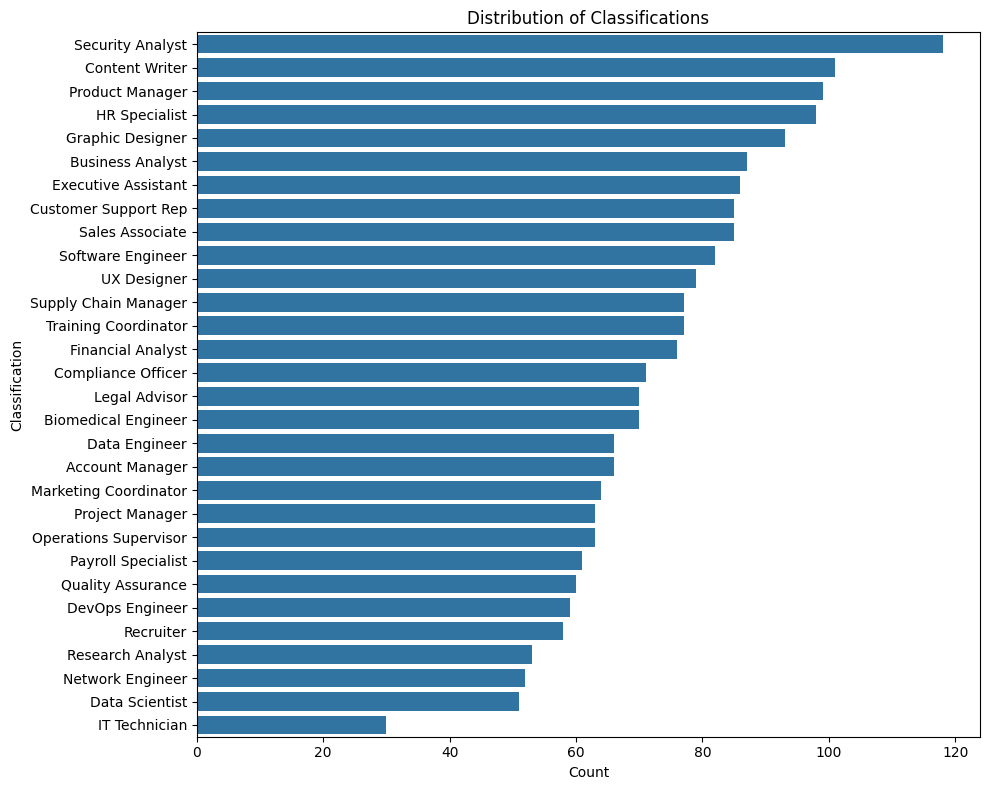

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of classifications
plt.figure(figsize=(10, 8))
sns.countplot(y='Classification', data=df, order=df['Classification'].value_counts().index)
plt.title('Distribution of Classifications')
plt.xlabel('Count')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

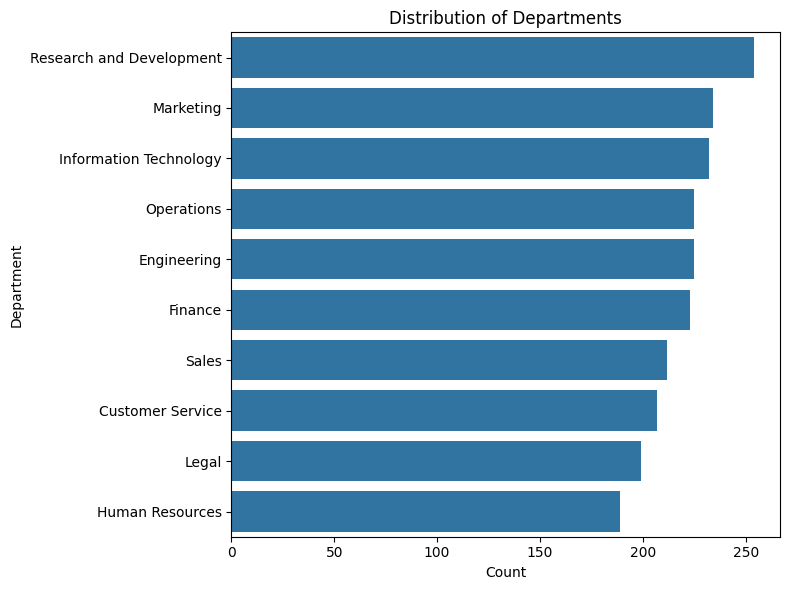

In [12]:
# Plot the distribution of departments
plt.figure(figsize=(8, 6))
sns.countplot(y='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Distribution of Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

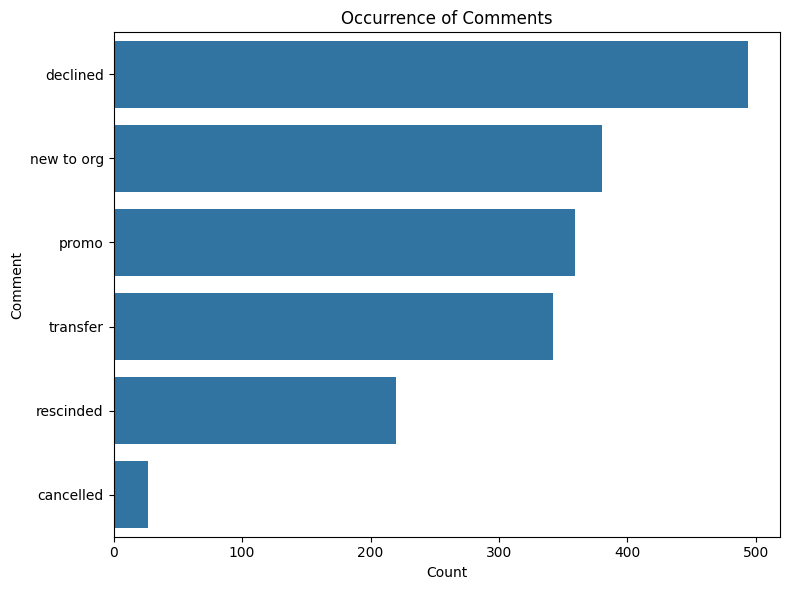

In [13]:
# Plot the occurrence of comments
comment_counts = df['Comments'].value_counts().drop('')
plt.figure(figsize=(8, 6))
sns.barplot(x=comment_counts.values, y=comment_counts.index)
plt.title('Occurrence of Comments')
plt.xlabel('Count')
plt.ylabel('Comment')
plt.tight_layout()
plt.show()

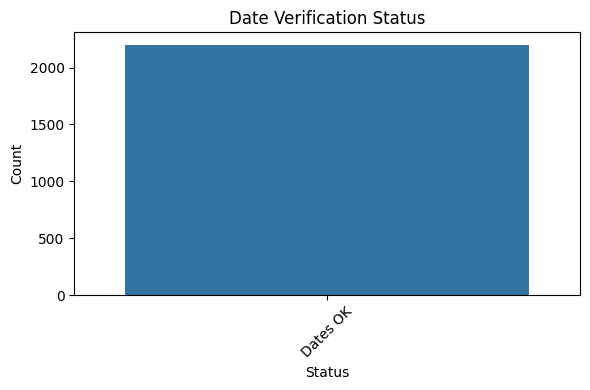

In [14]:
# Plot the date verification status
date_verification_counts = df['Date Verification'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=date_verification_counts.index, y=date_verification_counts.values)
plt.title('Date Verification Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Save to CSV
df.to_csv('hr_hiring_data_final.csv', index=False)
print("Dataset saved to 'hr_hiring_data_final.csv'")

Dataset saved to 'hr_hiring_data_final.csv'


In [16]:
# Load and display the dataset
df = pd.read_csv('hr_hiring_data_final.csv')
df.head()

,Recruitment Number,Position Number,Classification,Department,Interview Date,Selection,Job Offer Date,Effective Date,Comments,Date Verification
0,2867825,123-005-101-001,Software Engineer,Sales,2022-03-31,Melissa Miller,2022-04-19,NaN,declined,Dates OK
1,2867825,123-005-101-002,Software Engineer,Sales,2022-08-27,Jennifer Wilson,2022-09-13,2022-10-22,transfer,Dates OK
2,1445199,123-004-118-001,Network Engineer,Marketing,2022-01-07,Donna Moore,2022-02-01,2022-03-25,NaN,Dates OK
3,1445199,123-004-118-002,Network Engineer,Marketing,2022-10-12,Margaret Perez,2022-10-17,NaN,declined,Dates OK
4,1445199,123-004-118-003,Network Engineer,Marketing,2022-04-15,Edward Perez,2022-04-18,NaN,rescinded,Dates OK
